In [218]:
import os
if "rrszynka" not in os.getcwd():
   raise Exception("Working locally - is this desired?")
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime
import matplotlib.pyplot as plt
import sys
sys.path.append(os.getcwd()+'/../Python-modules/') #For bee_helpers, file_helpers and cache
from bee_cache import Cache, CacheType, CacheFormat; c = Cache()
from bee_helpers import calc_trip_lengths, get_forager_bee_ids, get_random_bee_ids, get_all_bee_ids, get_alive_bees_for_day
import bb_utils
import random
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
from ipywidgets import interact
from skimage.morphology import rectangle, closing

In [219]:
# Setup parameters 
datetime_start = datetime.datetime(2016,7,20)
num_hours = 24
num_intervals_per_hour = 120
bee_ids = get_alive_bees_for_day(datetime_start).bee_id.tolist()

In [220]:
# Get alive bees for the chosen day and filter other (dead) bees out of the presence table
bees_alive_for_day = get_alive_bees_for_day(datetime_start)['bee_id'].values
presence = c.load('PRESENCE-counts-2016-07-20_00_num_hours_24_int_size_120_conf_099_cams_0123', type=CacheType.presence, format=CacheFormat.csv)
presence.index.name = 'bee_id'
# Safety check
presence.shape[0] == len(bees_alive_for_day)

True

In [221]:
bee = 614 #random.choice(bees_alive_for_day)
xs = np.arange(0,presence.shape[1])
ys = presence.loc[bee]

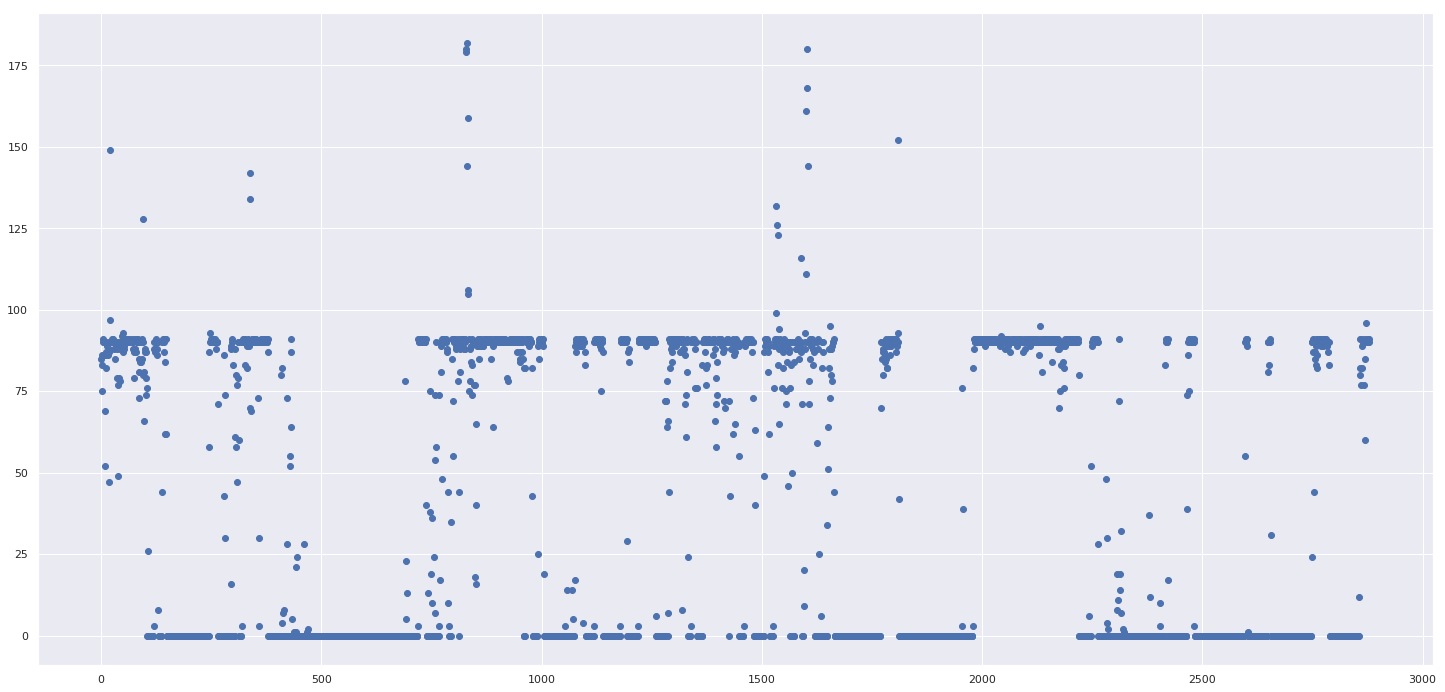

In [222]:
plt.figure(figsize=(25,12))
plt.scatter(xs,ys)

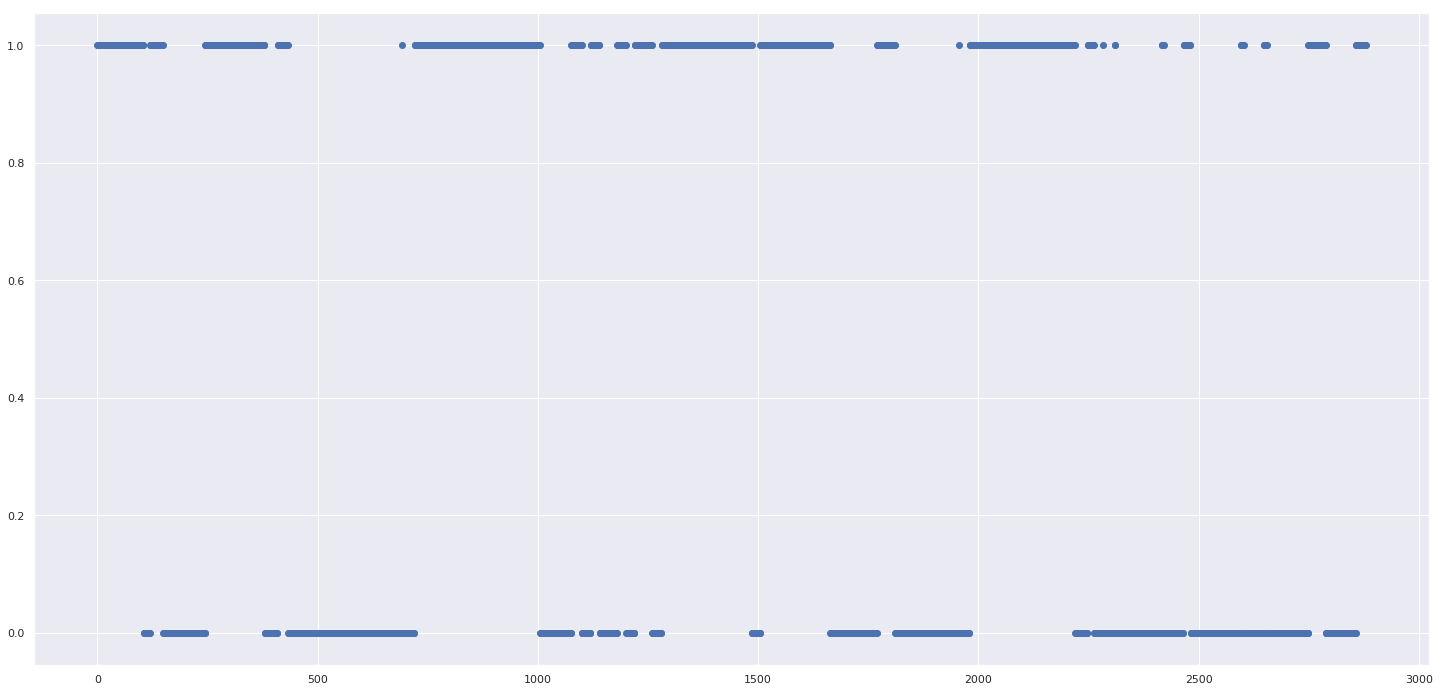

In [215]:
plt.figure(figsize=(25,12))
plt.scatter(xs,binarize_presence(presence.loc[bee]))

In [223]:
bin_pres = binarize_presence(presence.loc[bee])

In [207]:
def binarize_presence(presence_for_day_series):
    ys = presence_for_day_series
    ys[ys>90] = 90
    ys[ys>45] = 90
    ys[ys<=45] = 0  
    ys[ys==90] = 1 
    ys = np.reshape(np.array(ys, dtype=np.uint8),[1,ys.shape[0]])
    ys = closing(ys, rectangle(1,15))
    return ys

In [224]:
bin_pres.sum()

1445

###  Optional filtering of values >90. This step changes everything above 90 to 90. 

In [ ]:
ys[ys>90] = 90

## Testing closing 

In [201]:
bys = bin_pres(ys)

In [203]:
bys.sum()

1445

In [ ]:
scores[scores>45] = 90
scores[scores<=45] = 0
scores[scores==90] = 1 

In [ ]:
scores_copy = np.reshape(np.array(scores, dtype=np.uint8),[1,2880])

In [ ]:
closed_scores = closing(scores_copy, rectangle(1,15))

In [ ]:
# Create a trace
trace_old_scores = go.Scatter(
    x = np.arange(0,closed_scores.shape[1]),
    y = scores,
    mode = 'markers',
    marker = dict(
        size = 5,
    )
)

data_old_scores = [trace_old_scores]

# Plot and embed in ipython notebook!
py.iplot(data_old_scores, filename='basic-scatter')

In [ ]:
# Create a trace
trace_closed_scores = go.Scatter(
    x = np.arange(0,closed_scores.shape[1]),
    y = closed_scores.flatten(),
    mode = 'markers',
    marker = dict(
        size = 5,
    )
)

data_closed_scores = [trace_closed_scores]

# Plot and embed in ipython notebook!
py.iplot(data_closed_scores, filename='basic-scatter')

### Version 1: Using rolling median only, with variable window size

In [ ]:
fig = go.FigureWidget()
scatt = fig.add_scatter(
    mode='markers',
    marker=dict(
        size = 3
    )
)
fig

In [ ]:
@interact(a=(1, 500))
def update(a=1):
    with fig.batch_update():
        ys_rolled = ys.rolling(a).median()
        scatt.x=xs
        scatt.y=ys_rolled

### Version 2: Using threshold value only; 

In [ ]:

fig2 = go.FigureWidget()
scatt = fig2.add_scatter(
    mode='markers',
    marker=dict(
        size = 3
    )
)
fig

In [ ]:
@interact(threshold=(0, 90))
def update(threshold=1):
    with fig2.batch_update():
        pts = ys.copy()
        pts[pts>threshold] = 90
        pts[pts<=threshold] = 0
        scatt.x=xs
        scatt.y=pts

In [ ]:
ys = presence.loc[bee]